# Plumed Masterclass 22-9

Jupyter notebook to plot and analyze some results from the Masterclass exercises. 

This jupyter lab or notebook should preferably be started from the folder: masterclass-22-09/exercises/



In [3]:
# load some useful libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


## Exercise 1: vanilla MD on the Muller-Brown potential

Uncomment the following line to run the plumed simulation in folder 0_md.
The `run.me` script should have executable permissions.

In [4]:

# !cd 0_md; pwd; ./run.me


Potential grid size: 100 x 100


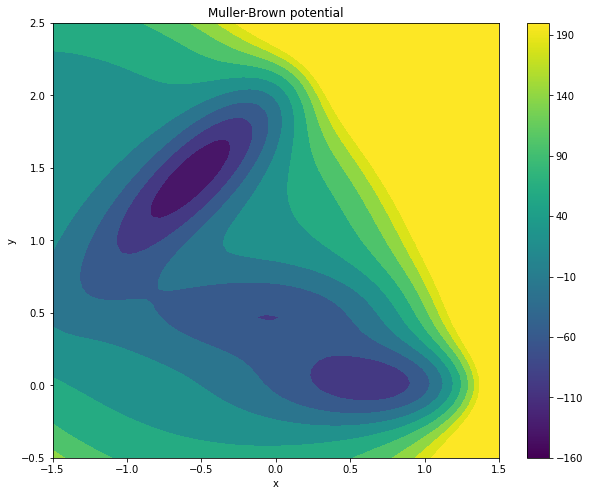

In [5]:
# read and plot 2D Muller-Brown potential energy surface
try:
    filename="0_md/potential.dat"
    with open(filename, "r") as infile:
 
        # read grid size from header
        try:
            line = infile.readline()
            nx = int(line.split()[1])
            ny = int(line.split()[2])
            print(f"Potential grid size: {nx} x {ny}")
        except:
            print(f"Error: wrong header in file {filename}")        

        # declare arrays
        xgrid = np.empty(nx)
        ygrid = np.empty(ny)
        vpot = np.empty([nx, ny])
        
        for i in range(nx):
            for j in range(ny):
                line = infile.readline()
                xgrid[i], ygrid[j], vpot[j][i] = [float(val) for val in line.split()]
                
            line = infile.readline()  # read empty line


except:
    print(f"Error: Failed to open and read file {filename}")        

    
# make potential contour plot
vmin = -160
vmax = 200
vfreq = 50
plt.figure(figsize=(10,8))
x, y = np.meshgrid(xgrid, ygrid)
cp = plt.contourf(x, y, vpot, levels=20, vmax=vmax)
# cp = plt.contourf(x, y, vpot, levels=20, vmax=200, cmap=cm.coolwarm)
# ax.clabel(cp, inline=True, fontsize=10)
cp.set_zmax = 200
plt.colorbar(plt.cm.ScalarMappable(norm=cp.norm, cmap=cp.cmap),ticks=range(vmin, vmax+vfreq, vfreq))
plt.title('Muller-Brown potential')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2.5)
# plt.savefig("mullerbrown.png")
plt.show()


### Plotting the trajectory from the colvar file



In [6]:
# function to open and read colvar file
def read_colvar(filename, cv1, cv2):
    with open(filename, "r") as infile:
        line = infile.readline()
        n = 0
        for line in infile:
            cv1[n] = float(line.split()[1])
            cv2[n] = float(line.split()[2])
            n += 1
    return n


In [7]:
maxsteps = 10000  # maximum number of steps in the simulations
filename = "0_md/colvar.out"

cv1 = np.empty(maxsteps)
cv2 = np.empty(maxsteps)

nsteps = read_colvar(filename,cv1,cv2)
print(nsteps)


5000


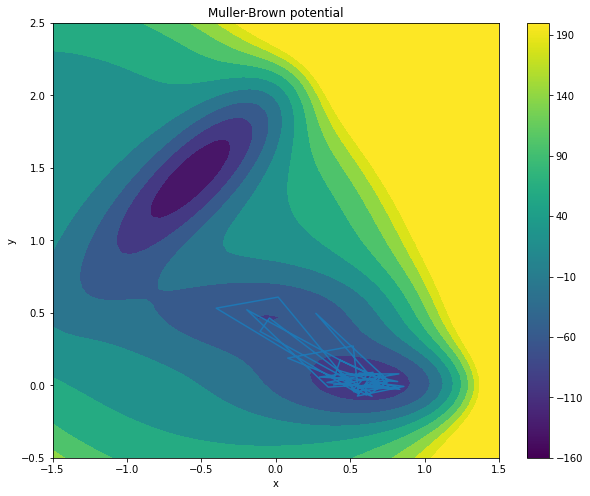

In [8]:
# make potential contour plot
vmin = -160
vmax = 200
vfreq = 50
plt.figure(figsize=(10,8))
x, y = np.meshgrid(xgrid, ygrid)
cp = plt.contourf(x, y, vpot, levels=20, vmax=vmax)
# cp = plt.contourf(x, y, vpot, levels=20, vmax=200, cmap=cm.coolwarm)
# ax.clabel(cp, inline=True, fontsize=10)
cp.set_zmax = 200
plt.colorbar(plt.cm.ScalarMappable(norm=cp.norm, cmap=cp.cmap),ticks=range(vmin, vmax+vfreq, vfreq))
plt.title('Muller-Brown potential')
plt.plot(cv1[:nsteps:100],cv2[:nsteps:100])
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1.5,1.5)
plt.ylim(-0.5,2.5)
plt.show()